<a href="https://colab.research.google.com/github/jaysriv1121/Stock_Market_Prediction/blob/main/ML_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting TATAGLOBAL Stock Market using ML**

In [ ]:
# Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
files.upload()

Saving NSE-TATAGLOBAL11.csv to NSE-TATAGLOBAL11.csv


{'NSE-TATAGLOBAL11.csv': b'Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)\n2018-10-08,208.0,222.25,206.85,216.0,215.15,4642146.0,10062.83\n2018-10-05,217.0,218.6,205.9,210.25,209.2,3519515.0,7407.06\n2018-10-04,223.5,227.8,216.15,217.25,218.2,1728786.0,3815.79\n2018-10-03,230.0,237.5,225.75,226.45,227.6,1708590.0,3960.27\n2018-10-01,234.55,234.6,221.05,230.3,230.9,1534749.0,3486.05\n2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914.0,7162.35\n2018-09-27,234.55,236.8,231.1,233.8,233.25,5082859.0,11859.95\n2018-09-26,240.0,240.0,232.5,235.0,234.25,2240909.0,5248.6\n2018-09-25,233.3,236.75,232.0,236.25,236.1,2349368.0,5503.9\n2018-09-24,233.55,239.2,230.75,234.0,233.3,3423509.0,7999.55\n2018-09-21,235.0,237.0,227.95,233.75,234.6,5395319.0,12589.59\n2018-09-19,235.95,237.2,233.45,234.6,234.9,1362058.0,3202.78\n2018-09-18,237.9,239.25,233.5,235.5,235.05,2614794.0,6163.7\n2018-09-17,233.15,238.0,230.25,236.4,236.6,3170894.0,7445.41\n2018-09-14,223.45,236.7,223.3,234.0,2

In [ ]:
# Store the data
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
# Show the data
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [ ]:
# Show and Store last row of data
actual_price = df.tail(1)
# Show the data
actual_price

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.0,157.8,155.2,155.8,155.8,1720413.0,2688.94


In [ ]:
# Get all the data except the last row
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1229,2013-10-15,160.00,160.20,155.35,157.10,158.05,1145582.0,1805.49
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80


In [ ]:
# Create empty list
days= list()
close_prices= list()  # previous- adj_close_prices

In [ ]:
# Get only dates and close prices
df_days= df.loc[:, 'Date']
df_close= df.loc[:, 'Close']  # previous- df_adj_close

In [ ]:
# Create independent data sets(dates)
for day in df_days:
   days.append([int(day.split('-')[2])])
# Createindependent data set(close prices)
for close_price in df_close:
   close_prices.append(float(close_price))

In [ ]:
# show the days
days


[[8],
 [5],
 [4],
 [3],
 [1],
 [28],
 [27],
 [26],
 [25],
 [24],
 [21],
 [19],
 [18],
 [17],
 [14],
 [12],
 [11],
 [10],
 [7],
 [6],
 [5],
 [4],
 [3],
 [31],
 [30],
 [29],
 [28],
 [27],
 [24],
 [23],
 [21],
 [20],
 [17],
 [16],
 [14],
 [13],
 [10],
 [9],
 [8],
 [7],
 [6],
 [3],
 [2],
 [1],
 [31],
 [30],
 [27],
 [26],
 [25],
 [24],
 [23],
 [20],
 [19],
 [18],
 [17],
 [16],
 [13],
 [12],
 [11],
 [10],
 [9],
 [6],
 [5],
 [4],
 [3],
 [2],
 [29],
 [28],
 [27],
 [26],
 [25],
 [22],
 [21],
 [20],
 [19],
 [18],
 [15],
 [14],
 [13],
 [12],
 [11],
 [8],
 [7],
 [6],
 [5],
 [4],
 [1],
 [31],
 [30],
 [29],
 [28],
 [25],
 [24],
 [23],
 [22],
 [21],
 [18],
 [17],
 [16],
 [15],
 [14],
 [11],
 [10],
 [9],
 [8],
 [7],
 [4],
 [3],
 [2],
 [30],
 [27],
 [26],
 [25],
 [24],
 [23],
 [20],
 [19],
 [18],
 [17],
 [16],
 [13],
 [12],
 [11],
 [10],
 [9],
 [6],
 [5],
 [4],
 [3],
 [2],
 [28],
 [27],
 [26],
 [23],
 [22],
 [21],
 [20],
 [19],
 [16],
 [15],
 [14],
 [13],
 [12],
 [9],
 [8],
 [7],
 [6],
 [5],
 [1],
 [28

In [ ]:
close_prices

[215.15,
 209.2,
 218.2,
 227.6,
 230.9,
 233.75,
 233.25,
 234.25,
 236.1,
 233.3,
 234.6,
 234.9,
 235.05,
 236.6,
 233.95,
 222.65,
 216.0,
 222.0,
 222.95,
 221.05,
 222.4,
 223.7,
 236.7,
 234.3,
 236.0,
 234.55,
 233.35,
 237.05,
 231.0,
 235.45,
 240.55,
 245.15,
 243.0,
 239.35,
 237.55,
 234.55,
 233.55,
 237.3,
 236.35,
 237.6,
 239.5,
 234.65,
 235.45,
 235.65,
 246.9,
 242.2,
 242.25,
 239.1,
 236.9,
 246.3,
 243.3,
 238.6,
 233.1,
 238.65,
 247.9,
 243.25,
 258.9,
 265.2,
 269.8,
 274.75,
 275.25,
 266.3,
 271.25,
 277.3,
 281.0,
 264.45,
 269.35,
 263.95,
 265.6,
 267.35,
 264.5,
 262.1,
 258.2,
 260.85,
 267.05,
 275.35,
 272.15,
 277.8,
 269.6,
 267.6,
 263.7,
 266.95,
 267.1,
 265.75,
 263.75,
 255.25,
 263.25,
 269.2,
 264.5,
 257.5,
 260.65,
 257.85,
 254.5,
 250.2,
 247.15,
 243.55,
 244.7,
 247.5,
 241.1,
 242.65,
 255.9,
 287.5,
 285.25,
 292.0,
 289.7,
 294.2,
 287.8,
 286.65,
 292.75,
 297.55,
 292.1,
 291.2,
 289.1,
 283.15,
 283.6,
 286.3,
 286.2,
 284.1,
 280

In [ ]:
# Create 3 models
lin_svr = SVR(kernel='linear', C= 1000.0)
lin_svr.fit(days, close_prices)

poly_svr = SVR(kernel='poly', C=1000.0)
poly_svr.fit(days, close_prices)

rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(days, close_prices)

SVR(C=1000.0, gamma=0.85)

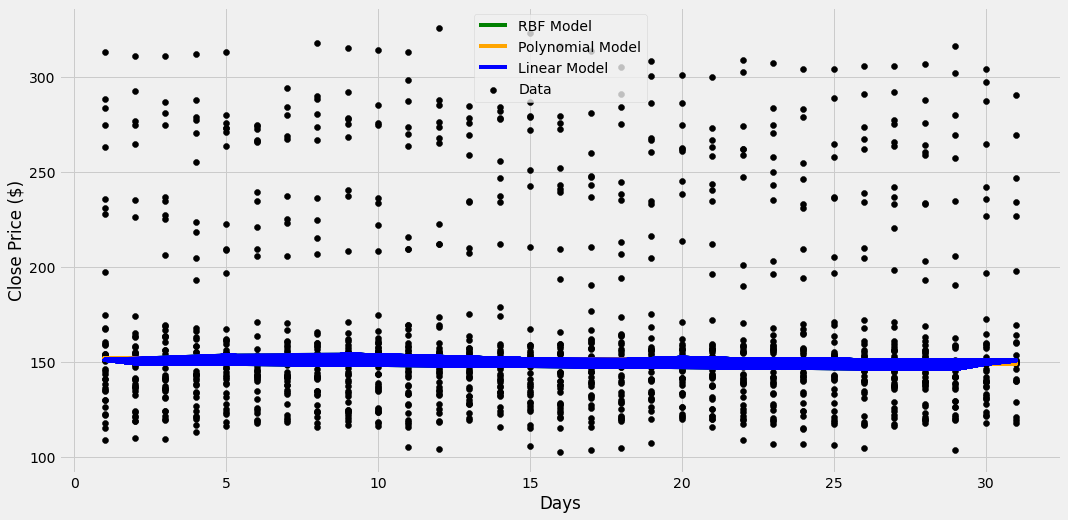

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days,close_prices, color='black', label='Data')
plt.plot(days, rbf_svr.predict(days), color= 'green', label= 'RBF Model')
plt.plot(days, poly_svr.predict(days), color= 'orange', label= 'Polynomial Model')
plt.plot(days, rbf_svr.predict(days), color= 'blue', label= 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

In [ ]:
# Show the price for given day
day= [[20131008]]
print(('The RBF SVR predicted price:', rbf_svr.predict(day)))
print(('The Linear SVR predicted price:', lin_svr.predict(day)))
print(('The Polynomial SVR predicted price:', poly_svr.predict(day)))

('The RBF SVR predicted price:', array([150.88830596]))
('The Linear SVR predicted price:', array([-2300533.86333705]))
('The Polynomial SVR predicted price:', array([-7.19428964e+17]))


In [ ]:
# Show the actual price
print('The actual price:', actual_price['Close'][1234])

The actual price: 155.8
